In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gen_path = 'C:\\Users\\Scott\\Downloads\\UCB_Mar_3\\UCB\\05-Matplotlib\\Homework\\Instructions\\Pymaceuticals\\raw_data\\'
clinical_data_path = gen_path + 'clinicaltrial_data.csv'
mouse_data_path = gen_path + 'mouse_drug_data.csv'


In [2]:
clinical_df = pd.read_csv(clinical_data_path)
mouse_df = pd.read_csv(mouse_data_path)

In [3]:
clinical_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
mouse_df.columns

Index(['Mouse ID', 'Drug'], dtype='object')

In [5]:
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [7]:
#pd.merge(df_new, df_n, left_on='subject_id', right_on='subject_id')
big_df = pd.merge(clinical_df,mouse_df,left_on='Mouse ID',right_on='Mouse ID')
big_df.head(4)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin


In [87]:
big_df.keys()
len(big_df)

1906

In [9]:
#drugs_over_time

In [10]:
history_df = big_df.groupby(['Drug','Timepoint']).mean()
history_err_df = big_df.groupby(['Drug','Timepoint']).sem()

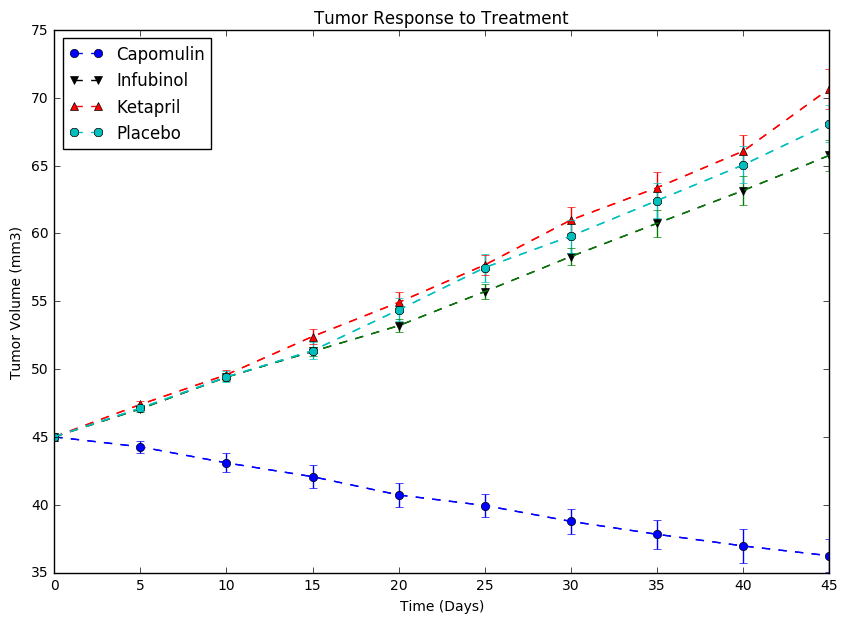

In [18]:
%matplotlib inline
drugs_over_time = history_df['Tumor Volume (mm3)'].unstack(level=0)
errors_over_time = history_err_df['Tumor Volume (mm3)'].unstack(level=0)
cool_colors = ['b','k','r','c']
markers = ['o','v','^','8']
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
fig, ax = plt.subplots(figsize=(10, 7))
for drug, marker_type, line_color in zip(drugs,markers,cool_colors):
    ax.plot(drugs_over_time[drug],linestyle='--',marker=marker_type,color=line_color,label=drug)
    ax.errorbar(errors_over_time.index,list(drugs_over_time[drug]),errors_over_time[drug],linestyle='--')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
legend = ax.legend(loc='upper left', shadow=False)
plt.show()

In [12]:
metastatic_over_time = history_df['Metastatic Sites'].unstack(level=0)
metastatic_over_time_errors = history_err_df['Metastatic Sites'].unstack(level=0)

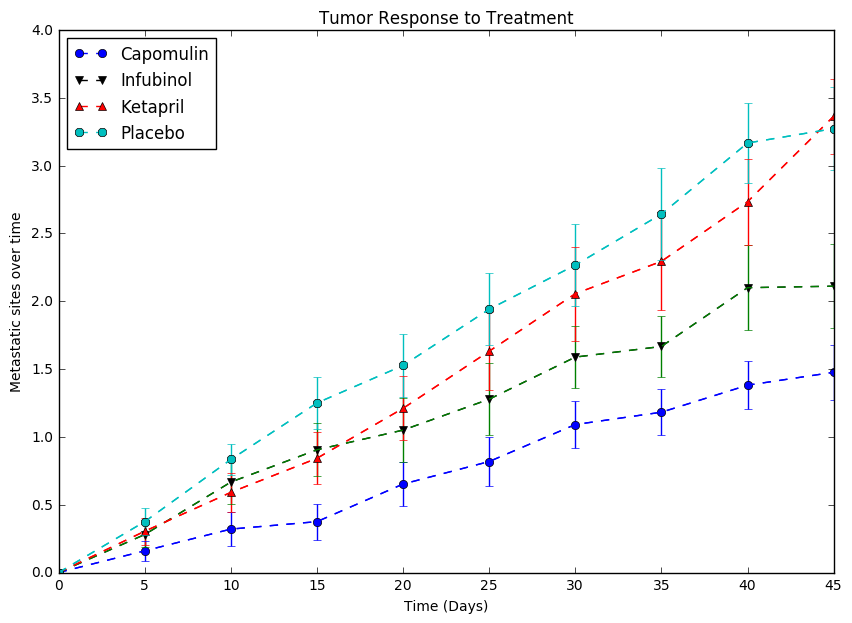

In [19]:
cool_colors = ['b','k','r','c']
markers = ['o','v','^','8']
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
fig, ax = plt.subplots(figsize=(10, 7))
for drug, marker_type, line_color in zip(drugs,markers,cool_colors):
    ax.plot(metastatic_over_time[drug],linestyle='--',marker=marker_type,color=line_color,label=drug)
    ax.errorbar(metastatic_over_time.index,list(metastatic_over_time[drug]),metastatic_over_time_errors[drug],linestyle='--')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic sites over time')
plt.title('Tumor Response to Treatment')
legend = ax.legend(loc='upper left', shadow=False)
plt.show()

In [14]:
#survival_df['Mouse ID'][drug]

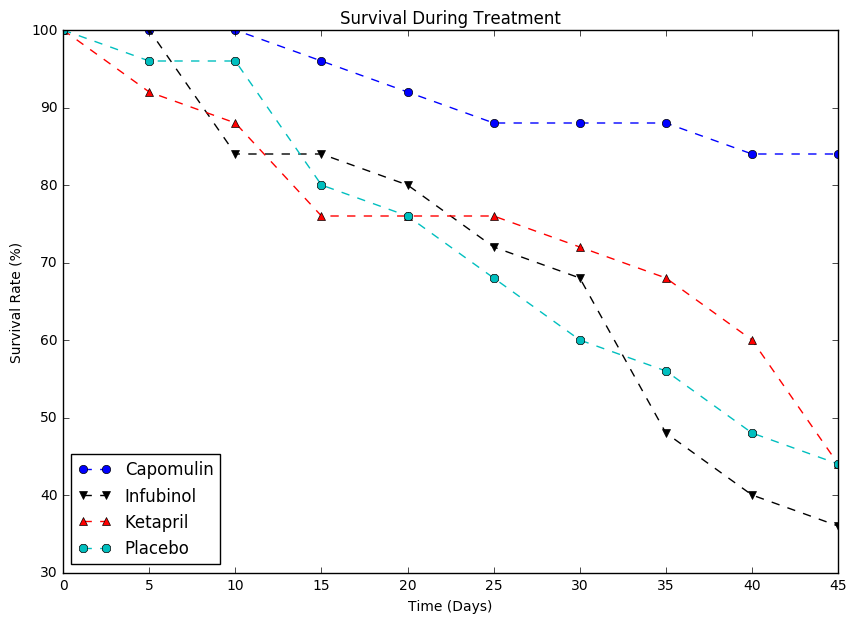

In [15]:
ugly_df = big_df.groupby(['Drug','Timepoint']).count()/.25
survival_df= ugly_df.unstack(level=0)

cool_colors = ['b','k','r','c']
markers = ['o','v','^','8']
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
fig, ax = plt.subplots(figsize=(10, 7))
for drug, marker_type, line_color in zip(drugs,markers,cool_colors):
    ax.plot(survival_df['Mouse ID'][drug],linestyle='--',marker=marker_type,color=line_color,label=drug)
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
legend = ax.legend(loc='lower left', shadow=False)
plt.show()

In [85]:
def autolabel(rects, ax,y_values):
    #http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect,i in zip(rects,range(0,len(y_values))):
        height = rect.get_height()
        direction = np.sign(y_values[i])
        ax.text(rect.get_x() + rect.get_width()/2., 5*direction,
        '%d%%' % int(height))

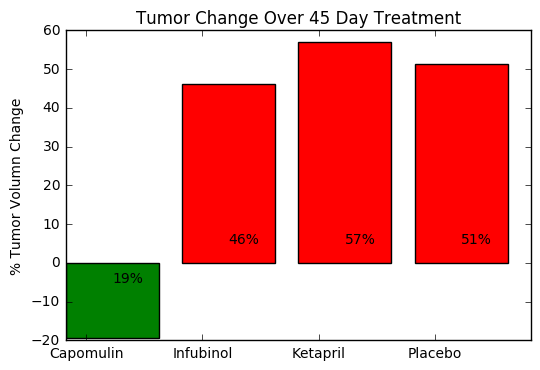

In [86]:

percent_vol_change = 100.*(drugs_over_time.loc[45]-drugs_over_time.loc[0])/45.
ind = np.arange(len(drugs))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
bar_color = [ 'red' if percent_vol_change[drugs][i] > 0.0 else "green" for i in range(0,len(percent_vol_change[drugs]))]
#percent_vol_change[drugs].plot(kind='bar',color=bar_color)
rects1 = ax.bar(range(0,len(drugs)),list(percent_vol_change[drugs]),color=bar_color)
ax.set_xlabel(' ')
ax.set_ylabel('% Tumor Volumn Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(drugs)
autolabel(rects1, ax, list(percent_vol_change[drugs]))


Observation of the data
1) Capomulin appears to be over all better in the three metrics studied 
    a) % change in tumor volumn over 45 day 
    b) Survival rate 
    c) Number of Metastatic sites. 
 2) Capomulin is significalty better than the placebo treatment in all three catagories.
 3) It's strange that all tumors started out at 45 mm^3.  This is too precise over 250 mice to be believable.  There was some preprocessing the data or something else is going on.